# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
# get EDA informartion
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [4]:
# check that there are no null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

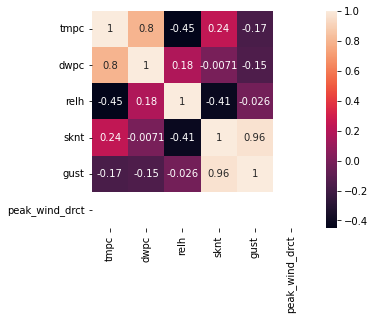

In [5]:
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern, i.e., no noticeable relationship between two variables
sns.heatmap(dataset.corr(), annot=True, square=True)

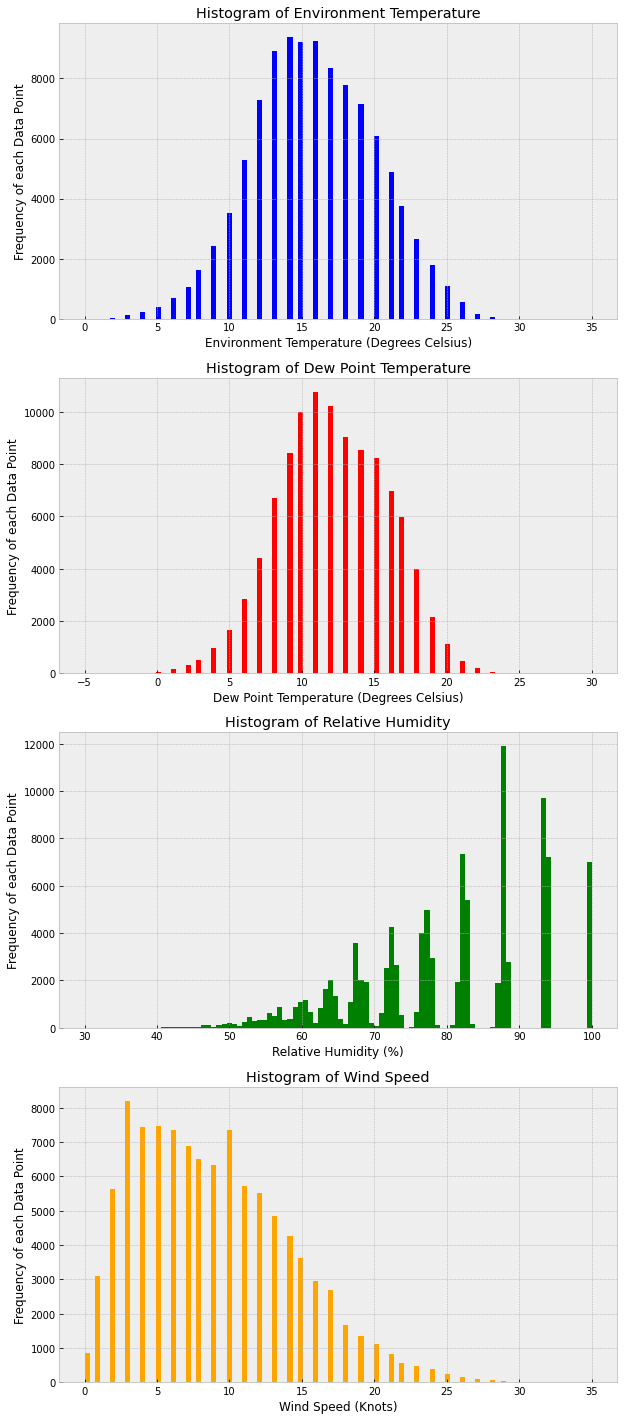

In [6]:
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)

ax1.hist(dataset["tmpc"], 100, (0,35), color="blue", histtype="bar", rwidth=1)
ax1.set_title("Histogram of Environment Temperature")
ax1.set_xlabel("Environment Temperature (Degrees Celsius)")
ax1.set_ylabel("Frequency of each Data Point")

ax2.hist(dataset["dwpc"], 100, (-5,30), color="red", histtype="bar", rwidth=1)
ax2.set_title("Histogram of Dew Point Temperature")
ax2.set_xlabel("Dew Point Temperature (Degrees Celsius)")
ax2.set_ylabel("Frequency of each Data Point")


ax3.hist(dataset["relh"], 100, (30,100), color="green", histtype="bar", rwidth=1)
ax3.set_title("Histogram of Relative Humidity")
ax3.set_xlabel("Relative Humidity (%)")
ax3.set_ylabel("Frequency of each Data Point")

ax4.hist(dataset["sknt"], 100, (0,35), color="orange", histtype="bar", rwidth=1)
ax4.set_title("Histogram of Wind Speed")
ax4.set_xlabel("Wind Speed (Knots)")
ax4.set_ylabel("Frequency of each Data Point")

fig.set_size_inches(10,25)
fig.show()

Plot 1 (Environment Temperature) Comments:

- The data appears to be normally distributed
- The minimum of the data is 2 degrees celsius
- The maximum of the data is 29 degrees celsius
- The mean average of the data is 15.81 degrees celsius

Plot 2 (Dew Point Temperature) Comments:

- The data appears to be normally distributed
- The minimum of the data is -2 degrees celsius
- The maximum of the data is 23 degrees celsius
- The mean average of the data is 12.11 degrees celsius

Plot 3 (Relative Humidity) Comments:

- The data is heavily left-skewed
- The minimum of the data is 29.23% relative humidity
- The maximum of the data is 100% relative humidity
- The median average of the data is 81.99% relative humidity

Plot 4 (Wind Speed) Comments:

- The data is heavily right-skewed
- The minimum of the data is 0 knots
- The maximum of the data is 42 knots
- The median average of the data 8 knots

Note that the average values for plots 3 and 4 we considered were the median average as opposed to the mean average, due to the skewed nature of the histograms.

# Data Processing

In [7]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# drop useless data columns
dataset.drop([' station', 'valid', 'gust', 'peak_wind_drct'], axis=1, inplace=True)

# convert timestamps to numerical values, where each numerical value represents the number of minutes passed from the beginning of EACH year.
timestamp_to_minutes = []
minutes = 0
for i in range(len(dataset["tmpc"])):
    # 525600 represents how many minutes there are in a year
    if minutes != 525600:
        minutes += 30
    else:
        minutes = 0
    timestamp_to_minutes.append(minutes)

# append the conversion as a column to the dataset & fill empty data cells with 0
dataset.insert(0, 'Timestamps as Minutes', timestamp_to_minutes)
dataset.fillna(0, inplace=True)

# create the test and train datasets with scikit-learn:
x_tmpc_train, x_tmpc_test, y_tmpc_train, y_tmpc_test = train_test_split (
    dataset[['Timestamps as Minutes']], dataset[['tmpc', 'dwpc', 'relh', 'sknt']], test_size=0.2, random_state=19843
)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Timestamps as Minutes  103713 non-null  int64  
 1   tmpc                   103713 non-null  float64
 2   dwpc                   103713 non-null  float64
 3   relh                   103713 non-null  float64
 4   sknt                   103713 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.0 MB


Reasons for each change made to the DataFrame:

 
- The 'station', 'valid', 'gust' and 'peak_wind_drct' columns in our original dataset were dropped as they were either mostly/entirely empty or contained non-numerical values which would not be able to be processed by our model

- The 'valid' column was instead replaced with the 'Timestamp as Minutes' column as this would serve as a numerical representation of our timestamps.

- In order to avoid runtime errors and have our model be able to process the dataframe, we had to remove all null values from the dataset, i.e., empty cells, so we replaced all null values with the numerical value of 0.

# Data Modelling

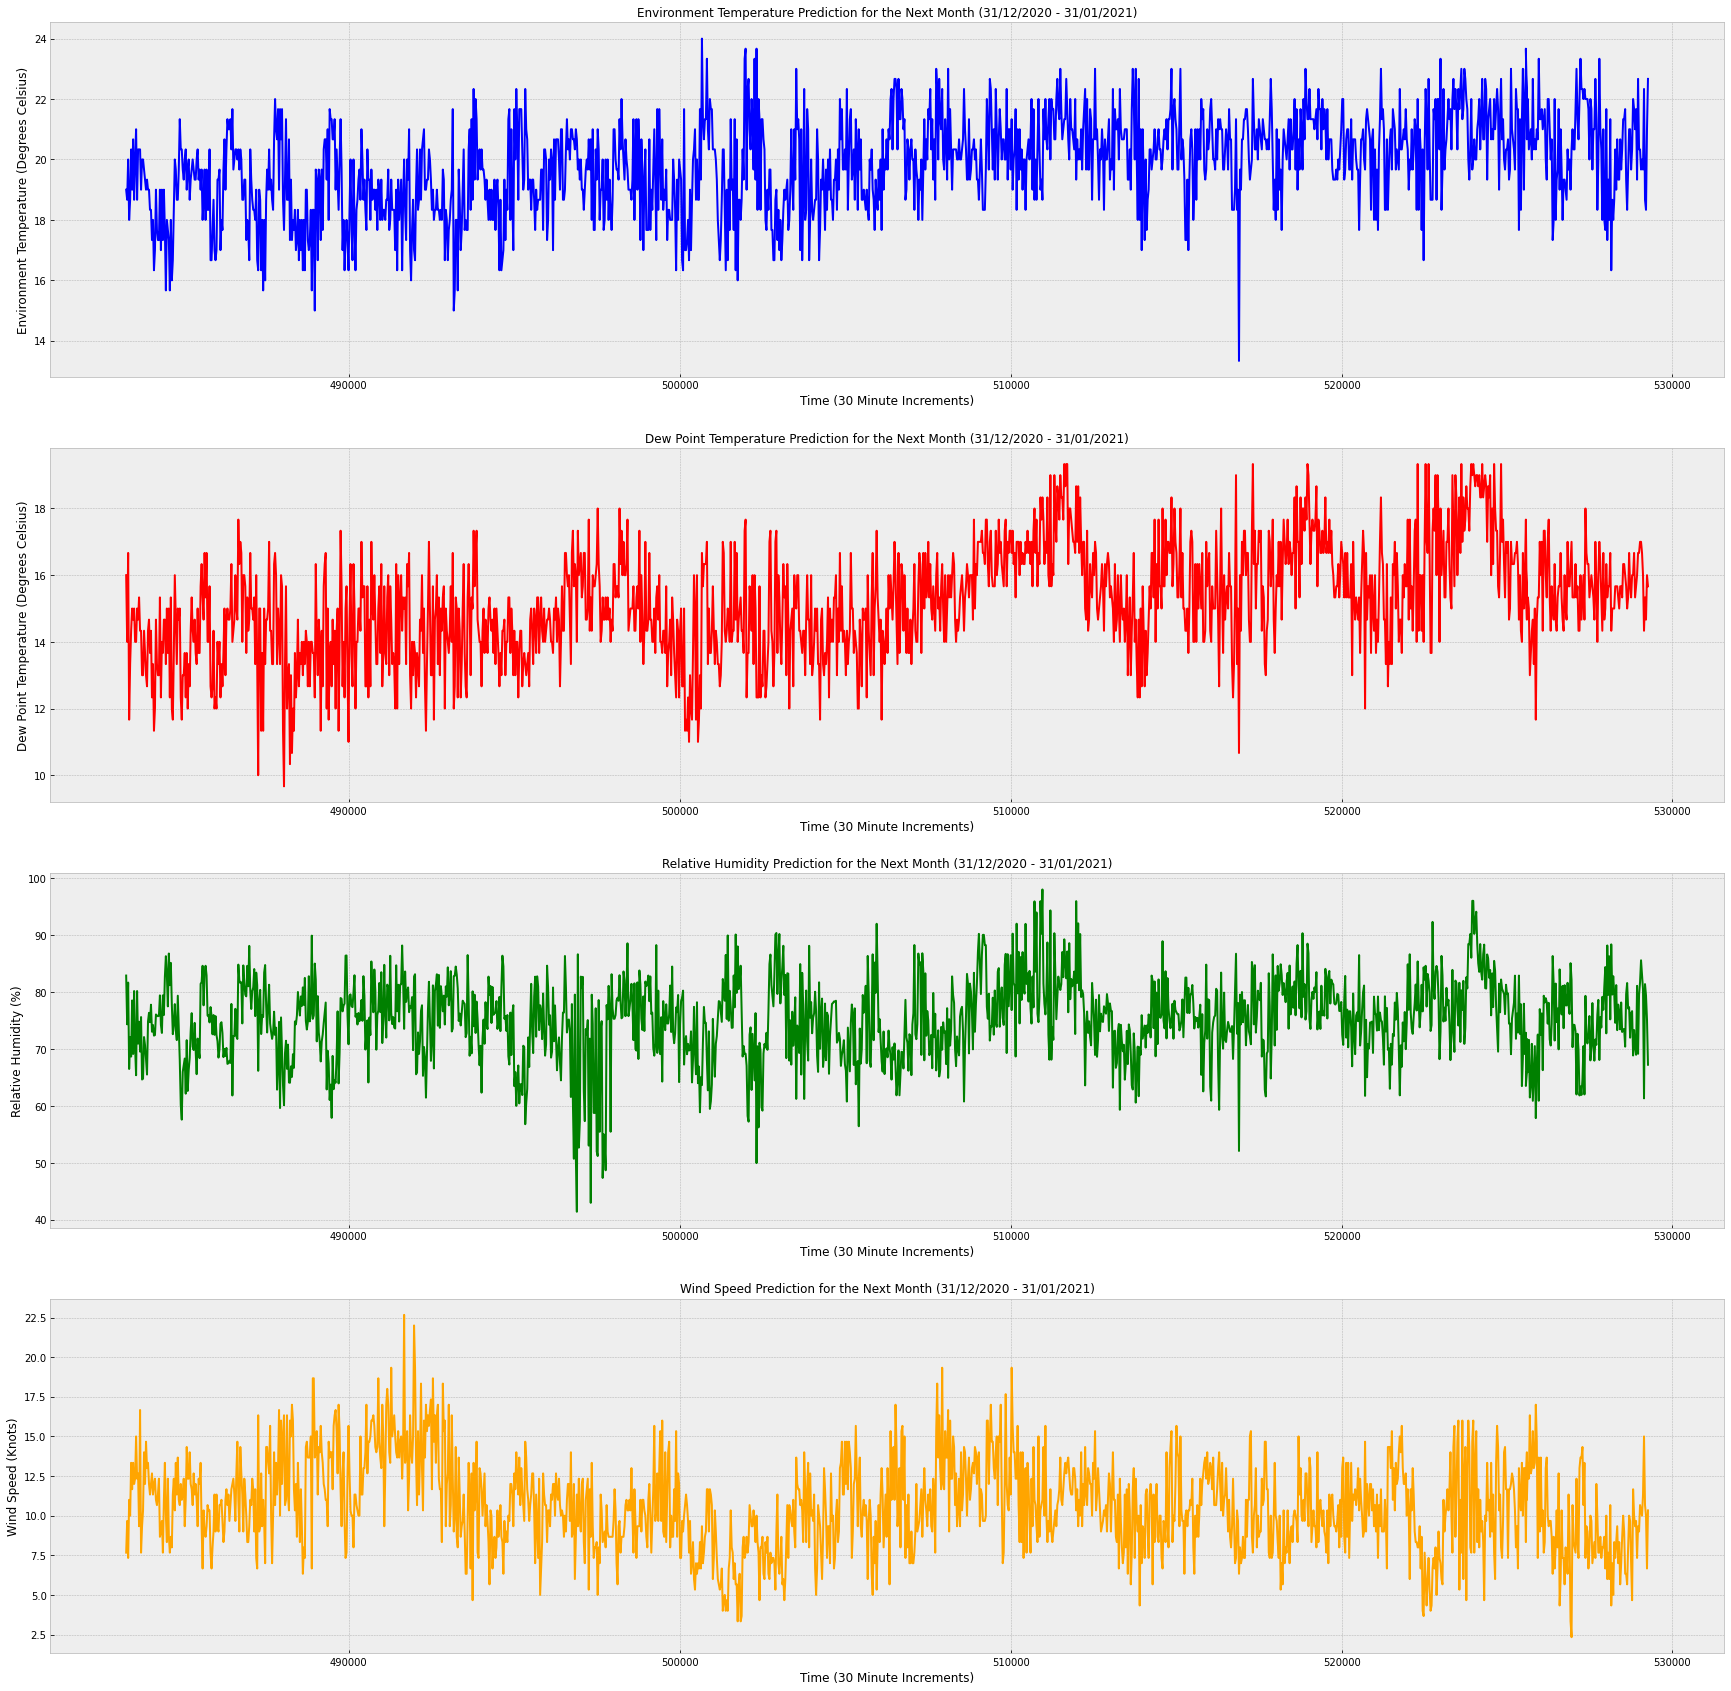

In [9]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_tmpc_train, y_tmpc_train)
knn_model.score(x_tmpc_test, y_tmpc_test)

month_prediction_timeframe = []
minutes = 483240

# We want to make a prediction for the next month, i.e., the 31st of December and the whole of January which is 32 days
# 1536 represents how many 30 minute intervals there are in 32 days
for i in range(1536):
    if minutes != 525600:
        minutes += 30
    else:
        minutes = 0
    month_prediction_timeframe.append(minutes)


# create data frame and use it to make prediction with our model
month_prediction_timeframe_df = pd.DataFrame(month_prediction_timeframe, columns=["0"])
prediction = knn_model.predict(month_prediction_timeframe_df)

prediction_df = pd.DataFrame(prediction, columns=["0","1","2","3"])
prediction_df.insert(0, "Future Month Timeframe", month_prediction_timeframe)

for i in range(1536):
    # 1412 is the index in our dataframe where the minutes reset to 0
    if i >= 1412:
        prediction_df.at[i, "Future Month Timeframe"] = 525570 + prediction_df._get_value(i, "Future Month Timeframe")

# graph the predictions
plt.style.use("bmh")
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1)

ax1.plot(prediction_df["Future Month Timeframe"], prediction_df["0"], color="blue")
ax1.set_title("Environment Temperature Prediction for the Next Month (31/12/2020 - 31/01/2021)", size=12)
ax1.set_xlabel("Time (30 Minute Increments)")
ax1.set_ylabel("Environment Temperature (Degrees Celsius)")

ax2.plot(prediction_df["Future Month Timeframe"], prediction_df["1"], color="red")
ax2.set_title("Dew Point Temperature Prediction for the Next Month (31/12/2020 - 31/01/2021)", size=12)
ax2.set_xlabel("Time (30 Minute Increments)")
ax2.set_ylabel("Dew Point Temperature (Degrees Celsius)")

ax3.plot(prediction_df["Future Month Timeframe"], prediction_df["2"], color="green")
ax3.set_title("Relative Humidity Prediction for the Next Month (31/12/2020 - 31/01/2021)", size=12)
ax3.set_xlabel("Time (30 Minute Increments)")
ax3.set_ylabel("Relative Humidity (%)")

ax4.plot(prediction_df["Future Month Timeframe"], prediction_df["3"], color="orange")
ax4.set_title("Wind Speed Prediction for the Next Month (31/12/2020 - 31/01/2021)", size=12)
ax4.set_xlabel("Time (30 Minute Increments)")
ax4.set_ylabel("Wind Speed (Knots)")

fig1.set_size_inches(30, 30)

fig1.show()

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.